<a href="https://colab.research.google.com/github/Ads369/Ads_2s/blob/main/19_1_Keras_v3_%D0%A1%D0%BE%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D0%BF%D0%BE%D0%B4%D1%85%D0%BE%D0%B4%D1%8B_%D0%BA_CV_(%D0%BA%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%BE%D0%B5_%D0%B7%D1%80%D0%B5%D0%BD%D0%B8%D0%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Навигация по уроку**

1. Keras v3. Современные подходы к CV (компьютерное зрение)
2. [Перенос обучения в Keras 3.0](https://colab.research.google.com/drive/1x2qd4MvG3ODgNrE2uqxRAZB70dGgdGft)
3. [Знакомство с KerasCV](https://colab.research.google.com/drive/1ZWfrEDQaQqDmVUF0yk7N4yoMHRkXf9K-)
4. [Домашняя работа](https://colab.research.google.com/drive/1ElbaB78l4c9BbIfHIgBMAzzr0-pBq4QO)

В данном уроке мы продолжим изучать сверточные нейронные сети и их применение в задачах компьютерного зрения. Одни и те же задачи можно решать с помощью разных инструментов, разных моделей и разных подходов. Поэтому в данном уроке мы покажем, как можно решить задачу классификации на примере известного нам датасете "Собаки и кошки", но используя более современную архитектуру сети, более современные подходы и более новую версию фреймворка.

Тем более с появлением Keras 3 (28 ноября 2023 года официальный выпуск) у нас расширился набор инструментов для разработки нейронных сетей.

Для разработчика нейронных сетей важно следить за тенденциями в области машинного обучения, изучать новые предобученные модели, включаемые в релизы фреймворков для машинного обучения. Крупные ИТ-гиганты стоят за фреймворками для машинного обучения и стремятся улучшить их, в-первую очередь, для своих сотрудников, вкладывая во фреймворки все свои знания и опыт. Обучать модели - достаточно трудоемкая процедура, требующая больших вычислительных ресурсов, терпения и опыта разработчиков. Поэтому "предобученные" модели - это опыт и большие вычислительные ресурсы, потраченные ИТ-гигантами специально для вас.

Что касается Keras 3, то это полная переработка фрейимворка, которая позволяет запускать рабочие процессы Keras поверх JAX, TensorFlow или PyTorch и открывает совершенно новые возможности для обучения и развертывания крупномасштабных моделей.

Keras 3 реализует полный API Keras и делает его доступным с TensorFlow, JAX и PyTorch. Это более сотни слоев, десятки метрик, функции потерь, оптимизаторы и обратные вызовы, циклы обучения и оценки Keras, а также инфраструктура сохранения и сериализации Keras. Любая модель Keras, использующая только встроенные слои, сразу же будет работать со всеми поддерживаемыми бэкэндами. Фактически, ваши ранее созданные модели, использующие только встроенные слои, могут работать не только с TensorFlow, но и в JAX и PyTorch!

То что мы раньше писали ориентируясь на TensorFlow, вся наша кодовая база получила совершенно новый набор возможностей.

Хотите выпустить предварительно обученную модель? Хотите, чтобы ей могло воспользоваться как можно больше людей? Если вы реализуете ее на чистом TensorFlow или PyTorch, ее сможет использовать примерно треть сообщества. Но если вы реализуете ее в Keras 3, ее мгновенно сможет использовать любой, независимо от выбранной платформы. Приятный бонус без дополнительных затрат на разработку!




На [стартовой странице](https://keras.io/keras_3/) официальной документации по API Keras 3.0 вы можете изучить все его преимущества и доводы почему немедленно должны начать его использовать.

## Задача о "Собаках и кошках"

А теперь давайте устроим настоящее испытание для Keras 3.0. И посмотрим так ли он хорош? И по зубам ли ему наша задача о "Собаках и кошках" на ограниченном наборе данных.



В соответствии с рекомендациями официальной документации API Keras 3.0 нам придется внести некоторые изменения в код:

1. Для генерации наборов данных мы будем использовать рекомендуемую утилиту `image_dataset_from_directory`.
2. Для нормализации изображений и их аугментации мы будем использовать слои предварительной обработки изображений.


### Переход на 3-й Keras

Чтобы перейти на 3-й Keras, необходимо обновить библиотеки в нашем Colab. Учтите, что для ваших вычислений Google предоставляет вам среду выполнения на ограниченный период (12 часов) и ограниченное число вычислительных единиц. Поэтому как только выделенные ресурсы закончаться и будут выделены новые (через 24 часа), придется заново переставлять библиотеки: по умолчанию Google предоставляет среду выполнения с Keras 2.

Прежде чем что-то обновлять, надо проверить текущую версию. Существует простой способ проверки версии библиотеки Keras:

In [ ]:
 import keras
print(keras.__version__)

2.15.0


In [ ]:
# Если вам результат выполнения ячейки приходит много лишней информации, то отключите ее, чтобы лишние сообщения библиотек не отвлекали вас от процесса
import warnings
warnings.filterwarnings('ignore')

Значит надо обновляться! Для перехода на версию Keras 3 выполним знакомую нам установку библиотеки с указанием версии и ключа `--upgrade` (обновляем библиотеку):

In [ ]:
!pip install --upgrade keras==3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.1/997.1 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.0 which is incompatible.


Предупреждение говорит о том, что после установки Keras, необходимо перезапустить сеанс среды выполнения. Таковы особенности всех Jupyter-подобных интерактивных сред выполнения. Сделать это можно двумя способами:
1. Нажать на предложенную в прошлой ячейке кнопку
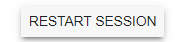

2. Перейти в пункт меню `Среда выполнения` и выбрать там пункт `Перезапустить сеанс`.

Выполните код ниже, если вы все сделали правильно, то увидите, что версия сменилась на 3-ю:

In [ ]:
import keras
print(keras.__version__)

3.0.0


Теперь можно перейти к разработке на Keras 3. Первое с чего надо начать - это определиться с бэкэндом, для этого достаточно всего лишь задать переменную окружения `KERAS_BACKEND`. Это здорово, что всего одной строчкой, мы теперь можем сменить "движок" нашей "ласточки"!

### Импортируем необходимые библиотеки

Разработку мы всегда начинаем с импорта библиотек.

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"  # Показываем Keras с каким бэкэндом работаем (jax, torch, tensorflow)!

import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

### Загружаем датасет

Загружаем уже известную нам коллекцию кошек и собак:

In [ ]:
!wget https://storage.yandexcloud.net/academy.ai/cat-and-dog.zip

--2024-05-15 09:57:33--  https://storage.yandexcloud.net/academy.ai/cat-and-dog.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228082266 (218M) [application/x-zip-compressed]
Saving to: ‘cat-and-dog.zip’

cat-and-dog.zip     100%[===================>] 217.52M  10.8MB/s    in 23s     

2024-05-15 09:57:58 (9.58 MB/s) - ‘cat-and-dog.zip’ saved [228082266/228082266]



Распаковываем архив с датасетом:

In [ ]:
# Разархивируем датасета в папку 'dataset'
!unzip -qo "cat-and-dog" -d ./dataset

# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = './dataset/training_set/training_set/'

### Отфильтруем поврежденные изображения


При работе с большим количеством реальных данных поврежденные изображения являются обычным явлением. Поэтому необходимо отфильтровать плохо закодированные изображения, в заголовке которых отсутствует строка "JFIF". JPEG и JPG картинки всегда содержат строку "JFIF". Если строка отсутствует файл "битый", либо другого формата. Просто довериться имени файлу и его расширению - это тоже вариант, но разработка программного обеспечения - это тонкая наука, здесь нельзя никому доверять и все нужно проверять! Тем более если вы используете не общеизвестные наборы данных, которые тестировались на множестве моделях (хотя и в них бывают ошибки), а собранный вами или подрядчиком, то шанс на ошибку значительно выше. Поэтому все данные необходимо проверять!

In [ ]:
num_skipped = 0 # счетчик поврежденных файлов
for folder_name in ("cats", "dogs"): # перебираем папки
    folder_path = os.path.join(IMAGE_PATH, folder_name) # склеиваем путь
    for fname in os.listdir(folder_path): # получаем список файлов в папке
        fpath = os.path.join(folder_path, fname) # получаем путь до файла
        try:
            fobj = open(fpath, "rb") # пытаемся открыть файл для бинарного чтения (rb)
            is_jfif = b"JFIF" in fobj.peek(10) # получаем первые 10 байт из файла и ищем в них бинарный вариант строки JFIF
        finally:
            fobj.close() # Закрываем файл

        if not is_jfif: # Если не нашли JFIF строку
            # Увеличиваем счетчик
            num_skipped += 1
            # Удаляем поврежденное изображение
            os.remove(fpath)

print(f"Удалено изображений: {num_skipped}")

Удалено изображений: 0


### Генерируем датасет

*Сгенерируем* датасет, используя рекомендуемый в документации метод `image_dataset_from_directory`:

In [ ]:
image_size = (180, 180) # все картинки приводим к фиксированному размеру
batch_size = 128 # размер пакетов на каждом шаге обучения

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    IMAGE_PATH, # путь к папке с данными
    validation_split=0.2, # отщепляем 20% на проверочную выборку
    subset="both", # указываем, что необходимо вернуть кортеж из обучающей и проверочной выборок ("training", "validation" или "both")
    seed=42,  # воспроизводимость результата генерации (результаты с одинаковым числом - одинаковы),
    shuffle=True, # перемешиваем датасет
    image_size=image_size, # размер генерируемых изображений
    batch_size=batch_size, # размер мини-батча
)

Found 8005 files belonging to 2 classes.
Using 6404 files for training.
Using 1601 files for validation.


### Визуализируем данные

Возьмем первый батч обучающей выборки и посмотрим на первые 9 картинок:

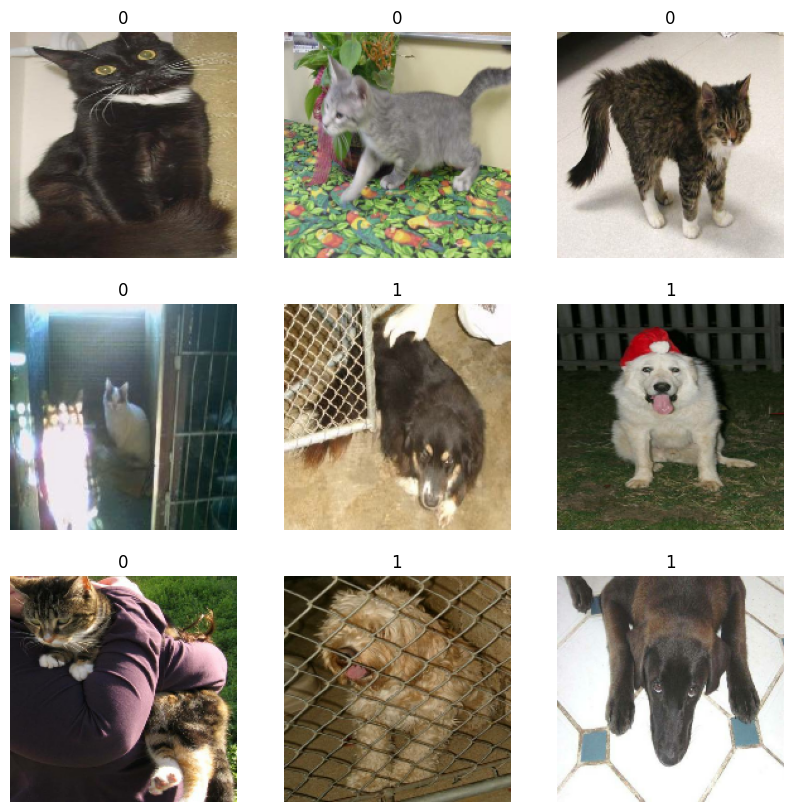

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(2): # берем первый батч обучающей выборки
    for i in range(9): # отрисуем первые 9 картинок батча
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i])) # покажем метки (0 - кошки, 1 - собаки)
        plt.axis("off") # отключаем отображение осей

### Аугментация данных

На прошлом уроке мы узнали, что если у нас нет большого набора данных изображений, хорошей практикой является искусственное внесение разнообразия в выборку путем применения случайных, но реалистичных преобразований к обучающим изображениям, таких как случайное переворачивание по горизонтали или небольшие случайные повороты. Это помогает ознакомить модель с различными аспектами обучающих данных, замедляя при этом переобучение.



In [ ]:
# Для аугментации мы используем слои преобразователи (они есть и в API Keras 2)
data_augmentation_layers = [
    layers.RandomFlip("horizontal"), # отражение по горизонтали
    layers.RandomRotation(0.15), # случайный поворот на 15%,
    layers.RandomBrightness(factor=0.2), # случайное изменение яркости
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1), # сдвиг на 10% по горизонтали и вертикали
    layers.RandomContrast(factor=0.1), # случайное изменение контрастности
]


def data_augmentation(images):
    # Слои - это функции, которые мы последовательно применяем к входным данным
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

Теперь можно визуализировать аугментированные образцы, например, применим `data_augmentation` 9 раз к первому изображению в батче:

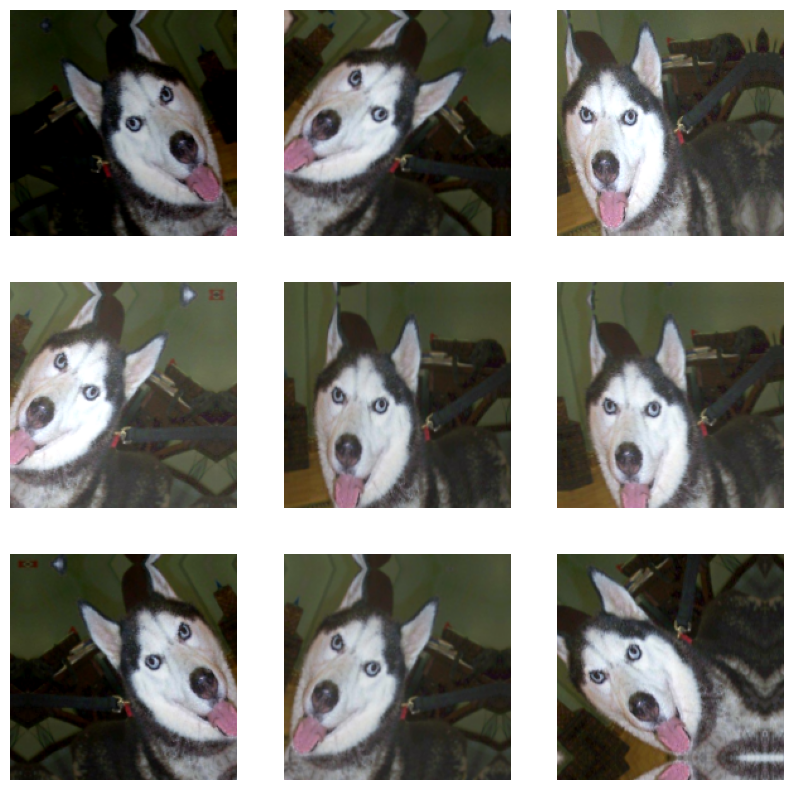

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images[0])
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images).astype("uint8"))
        plt.axis("off")

### Стандартизация данных

Изображения уже имеют стандартный размер (180x180), поскольку наш набор данных выдает их в виде непрерывных пакетов `float32`. Однако их значения канала RGB находятся в диапазоне `[0, 255]`. Это не идеально для нейронной сети. Мы должны стремиться к тому, чтобы входные значения были небольшими. Здесь мы стандартизируем значения, чтобы они были в диапазоне `[0, 1]`, используя слой масштабирования в начале нашей модели:
```python
x = layers.Rescaling(1./255)(x)
```

### Предварительная обработка данных

Выделяют два способа, с помощью которых можно внедрить предобработку `data_augmentation` в модель. Выбор способа зависит от типа процессора, который будет использоваться при обучении модели.

#### Вариант 1. Сделать аугментацию частью модели.

```python
inputs = keras.Input(shape=input_shape)
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
# Остальная часть модели

```

С помощью этой опции аугментация данных будет происходить на устройстве синхронно с остальной частью выполнения модели, поэтому следует ожидать, что такой подход выиграет от ускорения графического процессора.

Обратите внимание, что аугментация неактивна во время тестирования, поэтому входные выборки будут увеличены только во время `fit()`, а не при вызове `evaluate()` или `predict()`.

Если вы тренируетесь на графическом процессоре, то используйте этот способ.

#### Вариант 2: Применить аугментацию к набору данных

При таком подходе вы получаете генератор данных, который выдает пакеты аугментированных изображений:

```python
augmented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

```

С помощью этой опции аугментация будет происходить на процессоре асинхронно и будет буферизована перед входом в модель. Данные заранее будут загруженны в память и оптимизированны под доступный объем памяти.

Если вы обучаете модель на CPU-процессоре, это лучший вариант, поскольку он делает аугментацию асинхронной и неблокирующей.


Для нашего учебного примера выберем второй вариант. Общее правило, что если вы не уверены, какой вариант выбрать или заранее не знаете, на каком процессоре будут вычисления, то лучше выбрать вариант с асинхронной предварительной обработкой.

### Повышаем производительность

Давайте применим аугментацию к нашему набору обучающих данных и обязательно используем предварительную выборку с буферизацией, чтобы мы могли получать данные с диска без блокирования ввода-вывода:

In [ ]:
# Применяем `data_augmentation` к обучающей выборке
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf_data.AUTOTUNE, # число потоков для обработки в map (автонастройка зависит от возможностей процессора)
)
# Предварительная выборка примеров в память GPU или оперативную память
# Помогает максимально эффективно использовать графический процессор
train_ds = train_ds.prefetch(tf_data.AUTOTUNE)
val_ds = val_ds.prefetch(tf_data.AUTOTUNE)

### Конструирование модели


Мы создадим небольшую версию сети `Xception`. Подробно о модели можно почитать в публикации исследователя Google Inc. Franc¸ois Chollet (https://arxiv.org/pdf/1610.02357.pdf). Мы выбрали эту модель, чтобы вы могли оценить какую простую архитектуру для компьютерного зрения использовали ИТ-гиганты в 2017 году. Во многих архитектурах моделей для компьютерного зрения используются повторяющиеся слои и данная модель не исключение.

Модель, которую мы будем изучать имеет следующие особенности:
* В модель передаются уже аугментированные данные;
* Модель начинается со слоя масштабирования;
* Сеть использует "остаточное обучение";
* Перед окончательным слоем классификации мы добвляем слой Dropout для борьбы с переобучением;
* Помимо привычных нам слоев Conv2D в модели используется слой SeparableConv2D - это вариация традиционной свертки, которая была предложена для ее более быстрого вычисления. Она выполняет пространственную свертку по глубине, за которой следует поточечная свертка, которая смешивает результирующие выходные каналы (https://keras.io/api/layers/convolution_layers/separable_convolution2d/);
* В модели используется  `BatchNormalization`, о которой поговорим чуть позже и слой с функцией активации `layers.Activation("relu")`.

Любая нейронная сеть подразумевает подгонку модели под исходные данные путем серии линейных и нелинейных преобразований. Когда мы использовали полносвязный слой `Dense`:
```python
model.add(layers.Dense(64, activation='relu')),
```
то мы делали последовательно сначала линейное преобразование, а после нелинейное. Что полностью равноценно такой записи:

```python
model.add(layers.Dense(64))
model.add(layers.Activation("relu"))
```

Таким образом мы может использовать функцию активации для нелинейных преобразований без привязки к полносвязным слоям.

Важно понимать, что созданием таких сложных архитектур занимаются целые исследовательские центры, институты, а также научные группы технологических компаний-гигантов. В своей практике, вы будете проектировать более простые модели, но должны знать о существовании более продвинутых моделей, мониторить научные журналы и публикации ИТ-гигантов, изучать новые предобученные модели, включаемые во фреймворки, например, Keras.

In [ ]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Входной блок
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Устанавливаем обходную связь

    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Остаточный блок
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Соединяем выход остаточного блока и обходной связи (операция сложения)
        previous_block_activation = x  # Следующая обходная связь

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        units = 1
    else:
        units = num_classes

    x = layers.Dropout(0.25)(x)
    # We specify activation=None so as to return logits
    outputs = layers.Dense(units, activation=None)(x)
    return keras.Model(inputs, outputs)

In [ ]:
model = make_model(input_shape=image_size + (3,), num_classes=2)

В моделе используются неизвестные вам слои. Наберитесь терпения. Их мы рассмотрим ниже.

Посмотрите внимательно на график сети. Он имеет ветвистую структуру, которая идет в обход других блоков. Это особый прием остаточного обучения.

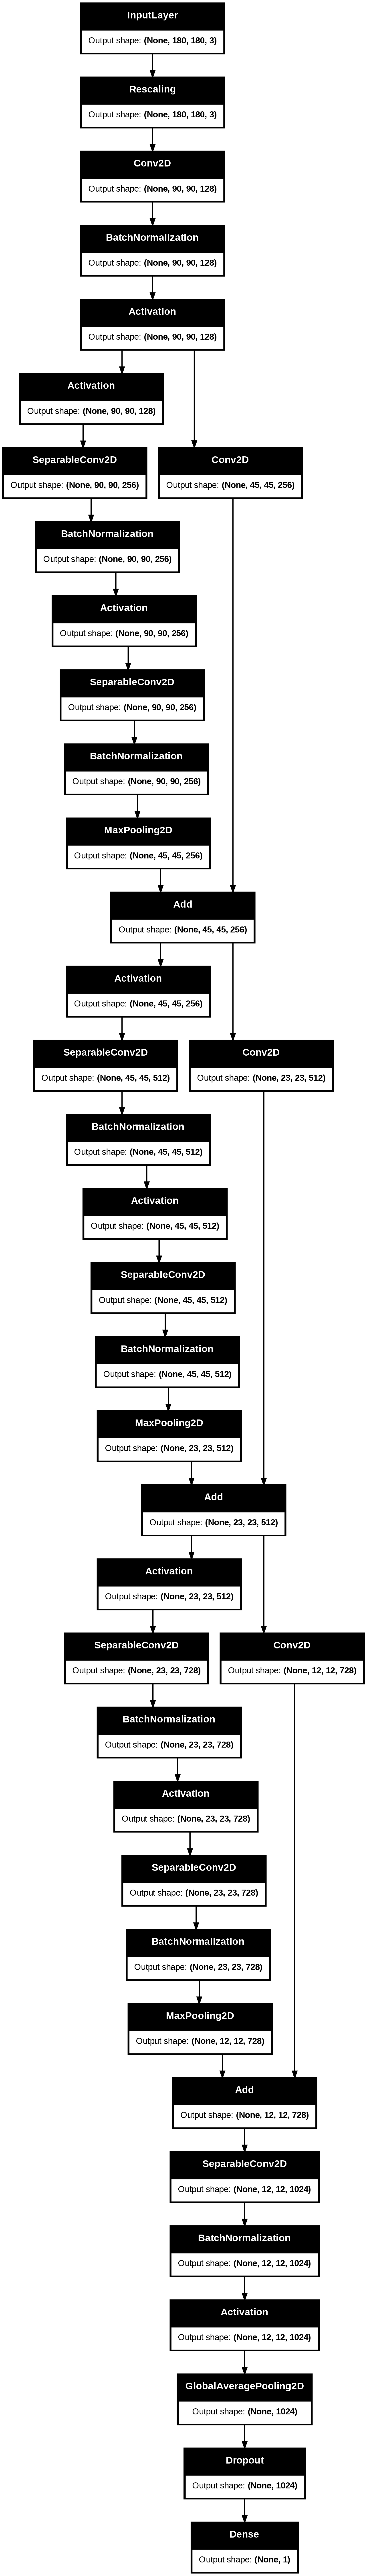

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

Добавим вспомогательную функцию для вывода графиков:

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_plot(history):
    acc = history.history['acc']
    epochs = range(1, len(acc) + 1)
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'r', label='Точность на обучающей выборке')
    plt.plot(epochs, val_acc, 'b', label='Точность на проверочной выборке')
    plt.title('График точности на обучающей и проверочной выборках')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'r', label='Потери на обучающей выборке')
    plt.plot(epochs, val_loss, 'b', label='Потери на проверочной выборке')
    plt.title('График потерь на обучающей и проверочной выборках')
    plt.legend()
    plt.show()

#### Остаточное обучение

Выше мы упомянули, что наша сеть использует остаточное обучение. Так что же это такое?

Для начала необходимо принять тот факт, что с увеличением глубины сети точность сначала увеличивается, а затем быстро ухудшается. Снижение точности обучения показывает, что не все сети легко оптимизировать. Это происходит из-за проблемы исчезающих градиентов, так как множество функций активации сокращают большое входное пространство до гораздо меньшего выходного (например, от 0 до 1 для сигмоиды). Поскольку большие изменения входа преобразуются в намного меньшие изменения выхода, производная, естественно, становится намного меньшей.

Поскольку цель повышения количества слоев, как правило, нахождение идеальных весов с помощью последовательных прямых проходов, расчетов функции потерь и обратного распространения. Процесс обратного распространения находит производные всей сети, продвигаясь от последнего слоя к первому. Используя цепное правило вычисления производных, производные каждого слоя умножаются друг на друга, чтобы получить производные входных слоев. Это повторяющееся умножение может сделать производные бесконечно малыми. А это значит, что веса входных слоев не будут эффективно обновляться в каждой сессии обучения. Поскольку эти входные слои критически важны для распознавания ключевых элементов входных данных, это может привести к неточности всей сети.

Для преодоления этой проблемы, компания Microsoft придумала в 2015 году глубокую «остаточную» структуру обучения. С оригинальной статьей можно ознакомиться здесь (https://arxiv.org/pdf/1512.03385.pdf).

Фактически с этой статьи началась новая эпоха в машинном зрении - эпоха ResNet. ResNet — это сокращенное название для Residual Network, что дословно означает «остаточная сеть».

**Идея простая**. Добавить входные данные к выходным, чтобы градиенты не исчезали так быстро. Достигается это путем введения "остаточных блоков" (residual blocks, ResBlock) и "обходной связи идентичности" (identity shortcut connection), которая обходит эти блоки (один или несколько слоев). Схема представленна на рис. 1.



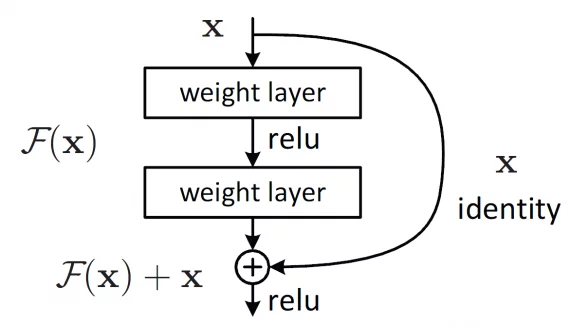

Рис. 1. Схема остаточного блока с обходной связью.

Если представить слой (или группу слоев), как функцию преобразования из `x` в `F(x)`, то введение остаточного блока меняет нашу цель оптимизации. Теперь мы подгоняем веса так чтобы оптимизировать не функцию `F(x)`, а `H(x) = F(x) + x`. Так как мы теперь обучаем сеть ориентируяся на выход остаточного блока.
Переставив члены этого уравнения, получим `F(x) = H(x) – x`, а это значит, что остаточный блок пытается обучать вход минус выход, иными словами остаточную функцию `F(x)` – отсюда и название "остаточный блок". Интуитивно, мы можем считать, что каждый блок теперь настраивает вывод предыдущего блока, и ему не приходится генерировать желаемый вывод с нуля.

Математическая интуиция - дело сложное! Но для нас здесь важно не понять почему, а как это повлияет на процесс обучения.

В [оригинальной статье]((https://arxiv.org/pdf/1512.03385.pdf)) по ResNet показано, что оптимизация этих остаточных блоков была намного проще.

>Добавление обходных связей позволило распространить большие градиенты до исходных слоев, смягчая эффект проблемы исчезающих градиентов и улучшая точность глубоких остаточных сетей по сравнению с более поверхностными аналогами. Также было показано, что широкое использование пакетной нормализации (batch normalization) по всей структуре ResNet повысило стабильность сети, заново центрируя и масштабируя данные по мере их прохождения через сеть.

Многие закономерности, выявленные в этой статье создали лавинообразный рост моделей в компьютерном зрении, целую серию научных исследований и публикаций. Эти закономерности были получены эмпирическим путем. В какой-то модели и на каком-то датасете эти методы работают хорошо, на каких-то не очень, поэтому любую модель стоит проверять на своем датасете.


### Зачем нам понадобилась нормализация на пакетах?

**Нормализация** — это широкая категория методов, стремящихся сделать сходство
разных образцов более заметным для модели машинного обучения, что помогает
модели выделять и обобщать новые данные.

Ранее мы уже использовали нормализацию, которая выполнялась перед передачей данных в модели: центрирование данных по нулю, путем вычитания среднего значения и придание единичного стандартного отклонения делением на их стандартное отклонение. Фактически такая нормализация предполагает, что данные соответствуют нормальному закону распределения (или закону Гаусса), центрируя и приводя это распределение к единичной дисперсии:

```python
normalized_data = (data - np.mean(data, axis=1)) / np.std(data, axis=1)
```
Однако нормализация должна проводиться после каждого преобразования, выполняемого сетью. Даже если данные на входе в сеть `Dense` или `Conv2D` имеют
среднее значение 0 и единичную дисперсию, нет оснований полагать, что то же
самое можно будет сказать в отношении данных на выходе.

**Пакетная нормализация** — это тип слоя (`BatchNormalization`), введенный в 2015 году Сергеем Йоффе (Sergey Ioffe) и Кристианом Сегеди (Christian Szegedy) (https://arxiv.org/pdf/1502.03167.pdf), который адаптивно нормализует данные, даже если среднее и дисперсия изменяются во время обучения. Его принцип действия основан на вычислении экспоненциального скользящего среднего и дисперсии данных, наблюдаемых в процессе обучения.

Основное назначение пакетной нормализации — помочь распространению градиента подобно остаточным связям и дать возможность создавать более глубокие сети.

Некоторые глубокие сети могут обучаться, только если они включают в себя несколько слоев `BatchNormalization`. Например, слои `BatchNormalization` широко используются во многих продвинутых архитектурах сверточных нейронных сетей, входящих в состав Keras, таких как ResNet50, Inception V3 и Xception.
Обычно слой `BatchNormalization` используется после сверточного или полносвязного слоя:

```python
conv_model.add(layers.Conv2D(32, 3, activation='relu'))
conv_model.add(layers.BatchNormalization()) # После слоя Conv2D

dense_model.add(layers.Dense(32, activation='relu'))
dense_model.add(layers.BatchNormalization()) # После слоя Dense

```

Также часто функцию активации выносят из слоя и выполняют только после нормализации:

```python
conv_model.add(layers.Conv2D(32, 3))
conv_model.add(layers.BatchNormalization())
conv_model.add(layers.Activation("relu"))
```

Слой `BatchNormalization` принимает аргумент `axis`, определяющий ось признаков для нормализации. По умолчанию этот аргумент принимает значение `–1`, что соответствует последней оси во входном тензоре. Это правильное значение,
когда используются слои `Dense`, `Conv1D`, рекуррентные слои и слои `Conv2D` со значением `channels_last` в аргументе `data_format`. Но в слоях `Conv2D` со значением `channels_first` в аргументе `data_format` ось признаков — это ось с индексом `1`, поэтому в таких случаях слою `BatchNormalization` следует передавать число `1` в аргументе `axis`.

### Раздельные свертки по глубине (SeparableConv2D)

Так называемые *раздельные свертки по глубине* (SeparableConv2D) - это свертки, который можно использовать взамен Conv2D и позволяющие сделать сеть более легкой
(с меньшим количеством обучаемых весовых параметров) и быстрой (с меньшим
количеством операций с вещественными числами), а также повысить качество
решения задачи на несколько процентных пунктов.

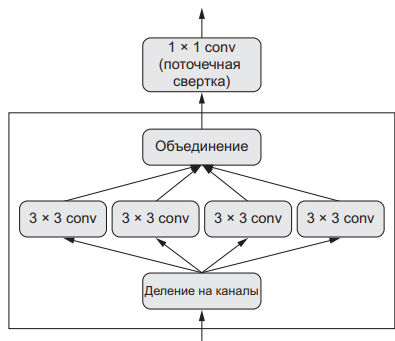

Этот слой выполняет пространственную свертку каждого канала во входных данных
в отдельности перед смешиванием выходных каналов посредством поточечной
свертки (свертки 1 × 1). Это эквивалентно раздельному выделению пространственных и канальных признаков, что оправданно, если предполагается сильная корреляция пространственных местоположений на входе, но разные каналы практически не зависят друг от друга. Он требует намного меньше параметров и выполняет меньше вычислений, благодаря чему получаются более быстрые модели с меньшими размерами. И поскольку это более репрезентативно эффективный способ выполнения свертки, он позволяет получать более качественные представления с меньшим объемом исходных данных и, соответственно, более качественные модели. Эти преимущества особенно важны для обучения небольших моделей с нуля на
ограниченном наборе данных.

В отношении крупных моделей раздельные свертки по глубине составляют основу
архитектуры Xception высококачественных сверточных нейронных сетей, входящей в состав Keras. Узнать больше о теоретических основах раздельной свертки
по глубине и архитектуре Xception можно в [статье](https://arxiv.org/pdf/1610.02357.pdf).

### Обучение модели с подбором параметров

Сложные модели достаточно сложно обучаются, из-за того, что градиенты плохо сходятся, поэтому хорошей практикой считается: начинать обучение с небольшого количества эпох, подбирая параметры. Так, например, на 5-ти эпохах понаблюдаем за точностью и ошибкой на проверочных данных, в качестве оптимизатора возьмем Adam с параметрами по умолчанию. В качестве функции потерь возьмем бинарную кросс-энтропию. Параметр `from_logits=True` указывает  на то, что метки в нашем наборе данных необходимо рассматривать как тензор значений (у нас метки: 0 - кошки, 1 - собаки). По умолчанию (False) мы предполагаем, что метки - это вероятности (т.е. значения в `[0, 1]`).

In [ ]:
epochs = 5

model.compile(
    optimizer='adam',
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy(name="acc")],
)
model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
)

Epoch 1/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - acc: 0.5321 - loss: 0.8244 - val_acc: 0.4922 - val_loss: 0.8795
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - acc: 0.5666 - loss: 0.7141 - val_acc: 0.5078 - val_loss: 3.3475
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - acc: 0.5846 - loss: 0.6808 - val_acc: 0.5078 - val_loss: 4.6790
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - acc: 0.6007 - loss: 0.6675 - val_acc: 0.5078 - val_loss: 2.8171
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - acc: 0.5713 - loss: 0.6964 - val_acc: 0.4922 - val_loss: 8.2905


Как мы видим на проверочных данных точность залипла на одном уровне. Если бы мы на этом этапе просто увеличили эпохи, то на обучающей выборке точность бы медленно росла до 72%, а на проверочной так же бы осталась в пределах 50%. Это очень плохой результат. Так как 50% - это случайный выбор из двух. Можете проверить!!! Мы не будем продолжать обучение и тратить драгоценное вычислительное время!

**Что же делать?**

Попробуем "столкнуть" ее (точность) с места очень маленьким шагом обучения. Проведем обучение на 5 эпохах, также используя оптимизатор `Adam` с шагом обучения `3e-5`.

In [ ]:
epochs = 5

# Добавляем колбеки, это функции которые выполняются по завершению эпохи в процессе обучения
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath = 'best_model_prelearn.keras', # имя файла для сохранения лучшей эпохи
                             monitor = 'val_acc', # лучший результат будем расчитывать по значениям точности на проверочной выборке
                             save_best_only = True, # сохраняем только лучший результат
                             mode = 'max', # функция применяемая к параметру monitor (в нашем случаем максимальное значение val_acc)
                             verbose = 0) # не логируем работу колбэка
]

model.compile(
    optimizer=keras.optimizers.Adam(3e-5),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy(name="acc")],
)
history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks, # мы добавили колбэк в обучение, для сохранение лучшей эпохи
    validation_data=val_ds,
)

Epoch 1/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - acc: 0.5608 - loss: 0.7205 - val_acc: 0.5054 - val_loss: 1.7521
Epoch 2/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - acc: 0.5836 - loss: 0.6784 - val_acc: 0.5078 - val_loss: 3.6370
Epoch 3/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - acc: 0.5935 - loss: 0.6777 - val_acc: 0.5078 - val_loss: 3.6437
Epoch 4/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - acc: 0.5834 - loss: 0.6769 - val_acc: 0.5066 - val_loss: 2.8735
Epoch 5/5
51/51 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - acc: 0.5976 - loss: 0.6610 - val_acc: 0.5036 - val_loss: 1.9386


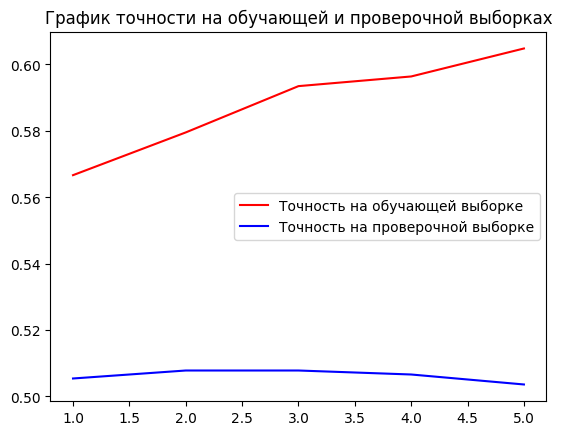

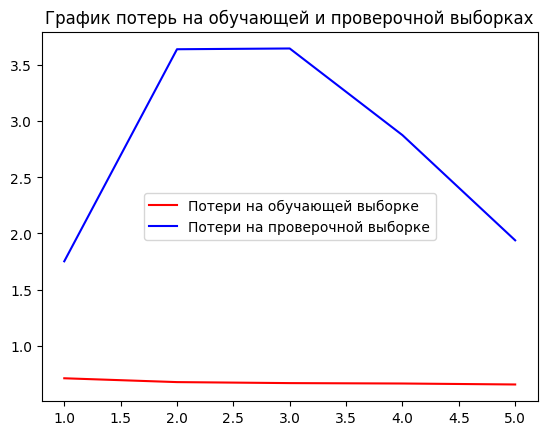

In [ ]:
show_plot(history)

#### Промежуточные вычисления. Механизм колбэков

В примере выше мы применили механизм колбэков. Колбеки в Keras - это функции, которые выполняют какое-либо действие в конце каждой эпохи обучения.

Мы добавили колбэк `ModelCheckpoint` (контрольные точки) для сохранения лучшей модели. Он имеет следующие параметры:

* **filepath**. Строка, содержащая путь для сохранения файла модели. Путь к файлу может содержать именованные параметры форматирования, которые будут заполнены значением переменных, вычисляемых в процессе обучения. Имя пути к файлу должно заканчиваться на `.weights.h5`, когда `save_weights_only=True` (сохраняем только веса модели), или должно заканчиваться на `.keras`, когда контрольная точка сохраняет всю модель (по умолчанию). Например, если путь к файлу равен `{epoch:02d}-{val_loss:.2f}.keras`, то контрольные точки модели будут сохранены с номером эпохи и потерей на проверочной выборке в имени файла. Отметим, что в Keras 2 мы сохраняли все модели с расширением `.h5`.
* **monitor**. Имя метрики для мониторинга. Все необходимые метрики мы добавляем в модель на этапе компиляции методом `model.compile`.
>Правила отслеживания метрик:
 * чтобы отслеживать метрики на этапе проверки, то добавьте к имени префикс `val_`;
 * используйте `loss` или `val_loss` для отслеживания общих потерь модели;
 * если вы указываете метрики в виде строк, например `accuracy`, передайте ту же строку (с префиксом `val_` для проверочной выборки или без него - для обучающей);
 * если вы передаете `metrics.Metric` метрики, монитор должен быть настроен на `metric.name`, т.е. для примера выше`keras.metrics.BinaryAccuracy(name="acc")` монитор настраиваем на имя `acc`);
 * если вы не уверены в названиях метрик, вы можете проверить содержимое словаря `history.history`, возвращаемого функцией `history = model.fit()`;
 * модели с несколькими выходами устанавливают дополнительные префиксы для имен метрик.

* **verbose**. Режим детализации, значения 0 или 1. Режим 0 отключен, а режим 1 отображает сообщения, когда колбэк выполняет какое-либо действие.
* **save_best_only**. Если `save_best_only=True`, то выполняется сохранение только в том случае, если модель считается "лучшей". Если путь к файлу не содержит параметров форматирования, таких как {epoch}, то путь к файлу будет перезаписываться каждой новой улучшенной моделью.
* **mode**. Возможные значения: `auto`, `min`, `max`. Если `save_best_only=True`, решение о перезаписи текущего файла сохранения принимается на основе либо максимизации, либо минимизации отслеживаемой метрики. Для `val_acc` следует установить `max`, для `val_loss` - должно быть `min` и т.д. В режиме `auto` режим устанавливается на `max`, если контролируемые метрики являются `acc` или начинаются с `fmeasure`, и устанавливаются на `min` для остальных количеств.
* **save_weights_only**. Если значение `True`, то будут сохранены только веса модели, что аналогично методу  `model.save_weights(filepath)`. Если значение `False`, то сохраняется полная модель, аналогично -  `model.save(filepath)`.
* **save_freq**. Возможные значения 'epoch' или целое число (integer). При использовании 'epoch' колбэк сохраняет модель после каждой эпохи. При использовании integer колбэк сохраняет модель в конце заданного количества пакетов. Если модель скомпилирована с `steps_per_execution=N`, то критерии сохранения будут проверяться в каждом `N`-м пакете. Обратите внимание, что если сохранение не привязано к эпохам, отслеживаемая метрика потенциально может быть менее надежной (она может отражать всего 1 пакет, поскольку метрики сбрасываются каждую эпоху). По умолчанию используется значение 'epoch'.
* **initial_value_threshold**. Начальное "наилучшее" значение с плавающей запятой для отслеживаемой метрики. Применяется только в том случае, если `save_best_value=True`. Перезаписывает уже сохраненные веса модели только в том случае, если производительность текущей модели лучше этого значения.

Часто бывает ситуация, когда обучение необходимо закончить раньше времени. Например, если с каждой эпохой модель становится "хуже". Для этих целей можно использовать колбэк `EarlyStopping`. Это колбэк ранней остановки по условию:

```python
keras.callbacks.EarlyStopping(
                    monitor='val_acc',
                    mode='max',
                    min_delta=0.001,
                    patience = 5)
```

Данный колбэк прекратит тренировку, когда отслеживаемый показатель перестанет улучшаться. Здесь целью тренировки является максимизация точности на проверочной выборке. Поэтому отслеживаемым показателем будет "точность" (`val_acc`), а режимом - "максимальный" (`max`). Цикл обучения `model.fit()` будет проверять в конце каждой эпохи, происходит ли увеличение точности на величину `min_delta` и осталось ли у нас "терпение" (`patience` - сколько эпох мы готовы ожидать изменения меньшие чем `min_delta`). Как только будет обнаружено, что точность больше не увеличивается, а "терпение" закончилось, `model.stop_training` помечается как `True`, и обучение завершается.

Пробежимся по аргументам `EarlyStopping`:

* **monitor**. Метрики, подлежащее мониторингу. По умолчанию используется значение `val_loss`.
* **min_delta**. Минимальное изменение отслеживаемой метрики, которую можно считать как улучшение, т.е. абсолютное изменение меньше `min_delta`, не будет считаться улучшением. Значение по умолчанию равно 0.
* **patience**. Количество эпох без улучшений, после которых обучение будет остановлено. Значение по умолчанию равно 0.
* **verbose**. Режим детализации, значения 0 или 1. Режим 0 отключен, а режим 1 отображает сообщения, когда колбэк выполняет какое-либо действие.
* **mode**. Возможные значения: `auto`, `min`, `max`. В режиме `min` обучение прекращается, когда отслеживаемая метрика перестает уменьшаться; в режиме `max` обучение прекращается, когда отслеживаемое количество перестает увеличиваться; в режиме `auto` направление автоматически определяется по названию отслеживаемой метрике. По умолчанию установлено значение `auto`.
* **baseline**. Базовое значение для отслеживаемой метрики. Если значение не равно `None`, то обучение будет остановлено при условии, что модель не покажет улучшения по сравнению с базовым уровнем. По умолчанию равно None.
* **restore_best_weights**. Восстанавливать ли веса модели из эпохи с наилучшим значением отслеживаемой метрики. Если значение равно `False`, используются веса модели, полученные на последнем шаге обучения. Если ни одна эпоха не улучшится по сравнению с базовой, тренировка будет продолжена для периодов терпения и восстановит веса с лучшей эпохи в этом наборе. По умолчанию установлено значение `False`.
* **start_from_epoch**. Количество эпох ожидания, прежде чем начать отслеживать улучшение. Это позволяет использовать период разминки, в течение которого улучшения не ожидаются, и, следовательно, тренировка не будет остановлена. По умолчанию равно 0.


#### Дообучение модели

Продолжим дообучать модель. Установим колбэки и продолжим обучение еще на 20 эпохах.

In [ ]:
epochs = 20

callbacks = [
    keras.callbacks.EarlyStopping(
                    monitor='val_acc',
                    mode='max',
                    min_delta=0.001,
                    patience = 5),

    keras.callbacks.ModelCheckpoint(filepath = 'best_model.keras',
                             monitor = 'val_acc',
                             save_best_only = True,
                             mode = 'max',
                             verbose = 0)
]


model.compile(
    optimizer=keras.optimizers.Adam(3e-5),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy(name="acc")],
)

history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - acc: 0.6008 - loss: 0.6654 - val_acc: 0.5257 - val_loss: 0.9729
Epoch 2/20


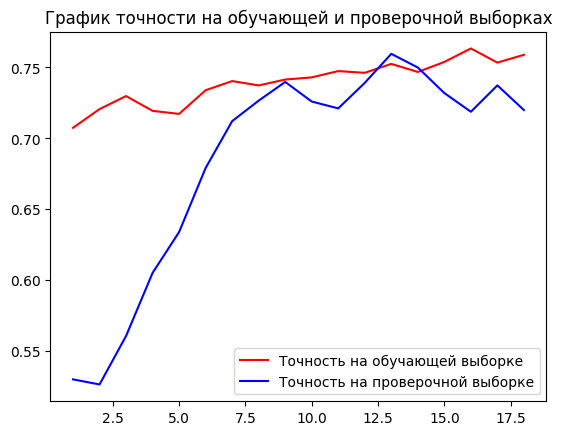

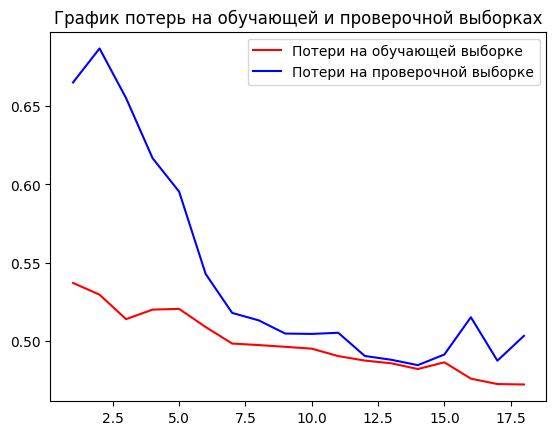

In [ ]:
show_plot(history)

Далее сохраним модель:

In [ ]:
model.save('model_before_timeout.keras')

И автоматически скачаем сохраненную модель:

In [ ]:
from google.colab import files
files.download('model_before_timeout.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Мы сохранили модель, так как в течение следующих 20 эпох Google Colab прервет наши вычисления, так как у нас закончится бесплатное время. Когда Google предоставит нам новые вычислительные ресурсы, то придется снова подключиться к графическому процессору и снова выполнить код до строчки:
```python
model = make_model(input_shape=image_size + (3,), num_classes=2)
```

После этого можно загрузить, сохраненую ранее модель и продолжить обучение:

In [ ]:
model = keras.saving.load_model('model_before_timeout.keras')

Так как модель по умолчанию сохраняется целиком, со всеми параметрами компиляции, то при загрузке (с параметрами по умолчанию), происходит ее автоматическая компиляция, и модель можно сразу обучать:

In [ ]:
epochs = 25

callbacks = [
    keras.callbacks.EarlyStopping(
                    monitor='val_acc',
                    mode='max',
                    min_delta=0.001,
                    patience = 10),

    keras.callbacks.ModelCheckpoint(filepath = 'best_model_2.keras',
                             monitor = 'val_acc',
                             save_best_only = True,
                             mode = 'max',
                             verbose = 0)
]


history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 299s 3s/step - acc: 0.7760 - loss: 0.4609 - val_acc: 0.7792 - val_loss: 0.4584
Epoch 2/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - acc: 0.7656 - loss: 0.4600 - val_acc: 0.7840 - val_loss: 0.4563
Epoch 3/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - acc: 0.7729 - loss: 0.4615 - val_acc: 0.7864 - val_loss: 0.4477
Epoch 4/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - acc: 0.7689 - loss: 0.4581 - val_acc: 0.7564 - val_loss: 0.4648
Epoch 5/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - acc: 0.7707 - loss: 0.4580 - val_acc: 0.7552 - val_loss: 0.4636
Epoch 6/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - acc: 0.7699 - loss: 0.4581 - val_acc: 0.7618 - val_loss: 0.4532
Epoch 7/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - acc: 0.7723 - loss: 0.4542 - val_acc: 0.7864 - val_loss: 0.4340
Epoch 8/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - acc: 0.7816 - loss: 0.4422 - val_acc: 0.7936 - val_loss: 0.4389
Epoch 9/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - acc: 0.7875 - lo

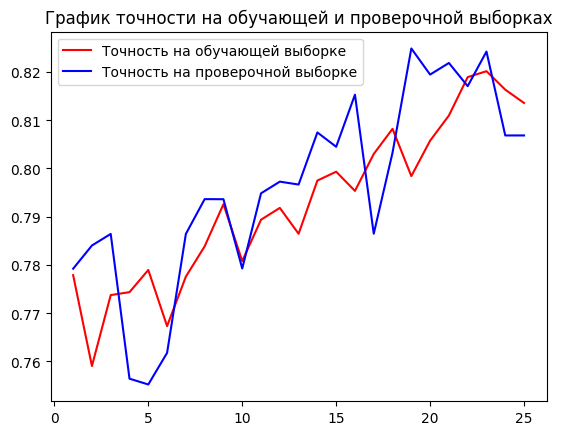

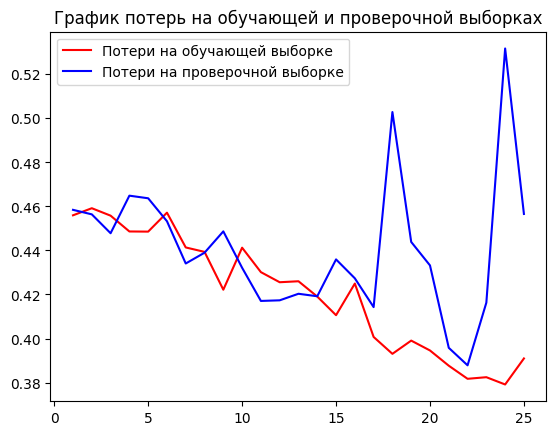

In [ ]:
show_plot(history)

Если мы видим, что модель за выделенное число эпох недостаточно обучилась, то можно загрузить "лучший" результат и продолжить обучение:

In [ ]:
epochs = 20

model = keras.saving.load_model('best_model_2.keras')

callbacks = [
    keras.callbacks.EarlyStopping(
                    monitor='val_acc',
                    mode='max',
                    min_delta=0.001,
                    patience = 10),

    keras.callbacks.ModelCheckpoint(filepath = 'best_model_3.keras',
                             monitor = 'val_acc',
                             save_best_only = True,
                             mode = 'max',
                             verbose = 0)
]

history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 280s 2s/step - acc: 0.8007 - loss: 0.4240 - val_acc: 0.8249 - val_loss: 0.3711
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - acc: 0.8157 - loss: 0.3780 - val_acc: 0.8243 - val_loss: 0.3736
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - acc: 0.8126 - loss: 0.3756 - val_acc: 0.7876 - val_loss: 0.4132
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - acc: 0.8207 - loss: 0.3715 - val_acc: 0.8267 - val_loss: 0.3723
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - acc: 0.8207 - loss: 0.3846 - val_acc: 0.8135 - val_loss: 0.3791
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - acc: 0.8206 - loss: 0.3782 - val_acc: 0.8147 - val_loss: 0.3870
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - acc: 0.8247 - loss: 0.3704 - val_acc: 0.8093 - val_loss: 0.4045
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - acc: 0.8194 - loss: 0.3774 - val_acc: 0.8351 - val_loss: 0.3584
Epoch 9/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - acc: 0.8197 - loss:

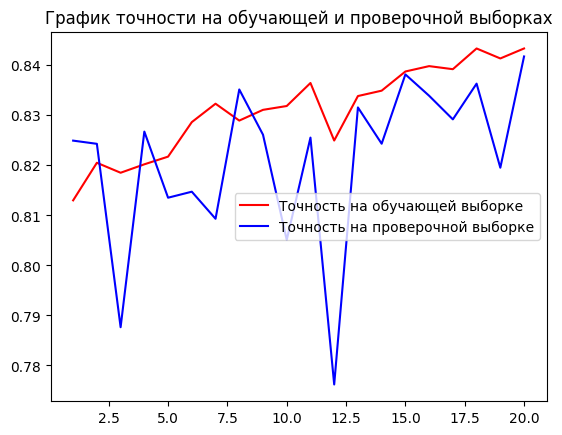

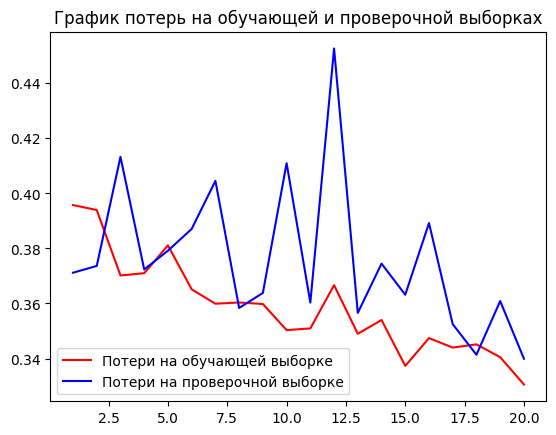

In [ ]:
show_plot(history)

Мы уже достигли точности в 84% на проверочной выборке. При этом нет переобучения и можно дальше продолжать обучать модель с теми же параметрами.

Но мы на этом остановимся и распознаем картинку из контрольного образца, которую еще не видела модель:



In [ ]:
TEST_IMG = './dataset/test_set/test_set/dogs/dog.4007.jpg'

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Это изображение на 6.20% кошка и на 93.80% собака.


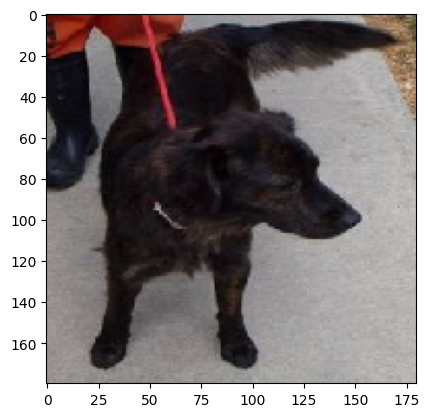

In [ ]:
img = keras.utils.load_img(TEST_IMG, target_size=image_size) # Загружаем картинку
plt.imshow(img)

img_array = keras.utils.img_to_array(img) # Преобразуем картинку в тензор
img_array = keras.ops.expand_dims(img_array, 0)  # Создание дополнительного измерения для батча

predictions = model.predict(img_array)
score = float(keras.ops.sigmoid(predictions[0][0])) # С помощью сигмоиды определим вероятность, что на картинке собака
print(f"Это изображение на {100 * (1 - score):.2f}% кошка и на {100 * score:.2f}% собака.")

Обратите внимание, что в Keras 3 реализовано пространство имен `ops`, которое содержит множество знакомых нам функций из numpy (https://keras.io/api/ops/). Все эти функции перенесены в Keras с целью их оптимизации под вычисления на графических процессорах, передачи результатов вычисления между CPU и GPU, адаптации под различные бэкенды, а также добавления нового класса мульти-бэкендных методов, которых нет в NumPy, но активно используются в TensorFlow, JAX или PyTorch.

Поэтому логика следующая. Если в своей практике вы продолжаете пользоваться Keras 2, то продолжаете пользоваться Numpy. Если же переходите на Keras 3, то появляется альтернатива перехода на родные инструменты Keras в пространстве имен `keras.ops`.

>Пространства имён в Python — это способ организации переменных, функций, классов и других объектов в коде. Они помогают избегать конфликтов имен и делают код более читаемым и понятным. Это механизм, который позволяет разделять имена переменных, функций и других объектов в коде.

Продолжим знакомство с Keras 3 и разберем вопрос переноса обучения, используя одну из самых популярных моделей компьютерного зрения. [Перенос обучения в Keras 3.0](https://colab.research.google.com/drive/1x2qd4MvG3ODgNrE2uqxRAZB70dGgdGft)